In [223]:
import pandas as pd

In [224]:
#reading data
df  = pd.read_csv('/content/Bank_customers_data_test.csv')

In [225]:
df.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


In [226]:
#checking data and columns
df.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


In [227]:
df.shape

(4014, 13)

In [228]:
df.describe()

,Unnamed: 0,Customer ID,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4.014000e+03,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,2006.500000,1.696831e+08,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,1158.886319,8.865374e+07,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,0.000000,1.000000e+08,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,1003.250000,1.000020e+08,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,2006.500000,1.000038e+08,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,3009.750000,2.000031e+08,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,4013.000000,4.000038e+08,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4014 non-null   int64  
 1   Customer ID         4014 non-null   int64  
 2   Name                4014 non-null   object 
 3   Surname             4014 non-null   object 
 4   Gender              4014 non-null   object 
 5   Age                 4014 non-null   int64  
 6   Region              4014 non-null   object 
 7   Job Classification  4014 non-null   object 
 8   Date Joined         4014 non-null   object 
 9   Balance             4014 non-null   float64
 10  loan                4014 non-null   float64
 11  score               4014 non-null   float64
 12  loan_eligibility    4014 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 407.8+ KB


In [230]:
#checking duplicate columns
df.duplicated().sum()

0

In [231]:
#dropping unnecessary column
df = df.drop(columns=['Unnamed: 0','Customer ID','Name','Surname'],axis=1)

In [232]:
df.head()

,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


In [233]:
#checking correlation of numeric columns
df.corr(numeric_only = True )

,Age,Balance,loan,score,loan_eligibility
Age,1.000000,0.009359,0.001350,-0.014959,-0.217723
Balance,0.009359,1.000000,0.038787,-0.001151,0.433671
loan,0.001350,0.038787,1.000000,-0.028720,-0.002953
score,-0.014959,-0.001151,-0.028720,1.000000,0.299763
loan_eligibility,-0.217723,0.433671,-0.002953,0.299763,1.000000


In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

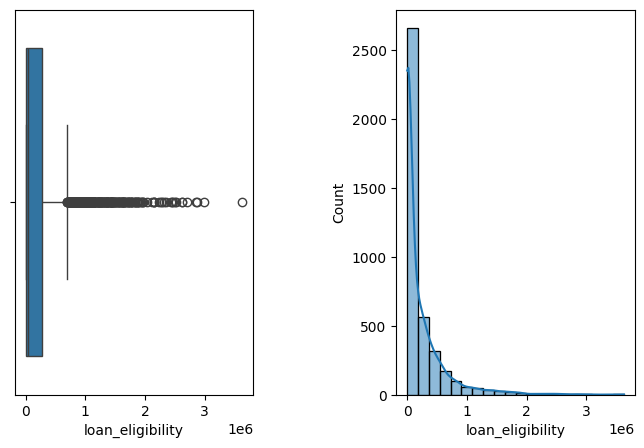

In [235]:
#visualizing loan eligibilty column
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='loan_eligibility',data=df,ax=ax[0])
sns.histplot(x='loan_eligibility',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)





In [236]:
# import numpy as np

# df['loan_eligibility'] = np.log(df['loan_eligibility'])

<Axes: xlabel='score'>

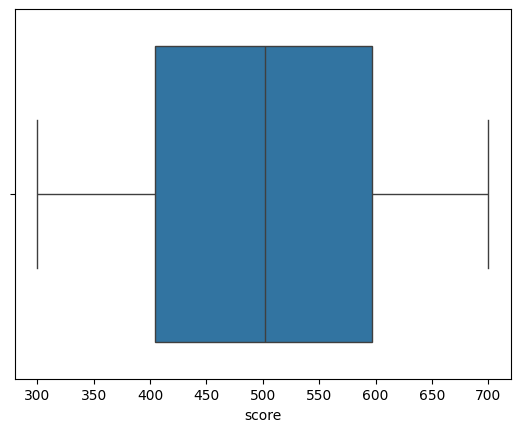

In [237]:
sns.boxplot(x='score',data=df)

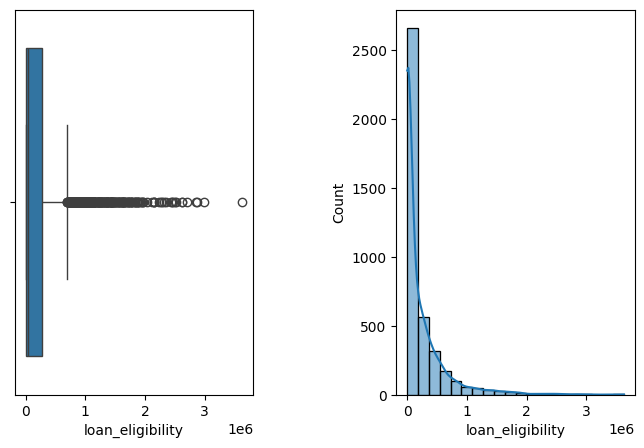

In [238]:
# def draw_visual(col):
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='loan_eligibility',data=df,ax=ax[0])
sns.histplot(x='loan_eligibility',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)





<Axes: xlabel='Balance'>

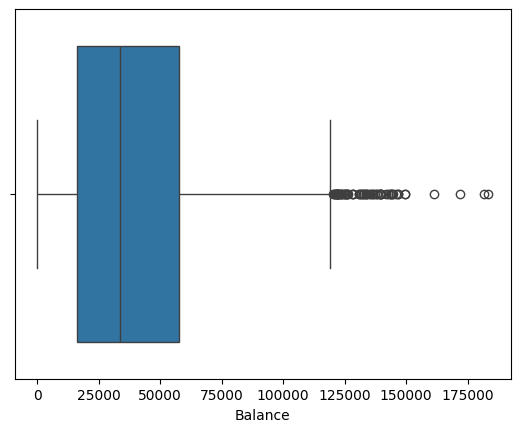

In [239]:
sns.boxplot(x='Balance',data=df)

<Axes: xlabel='Region', ylabel='count'>

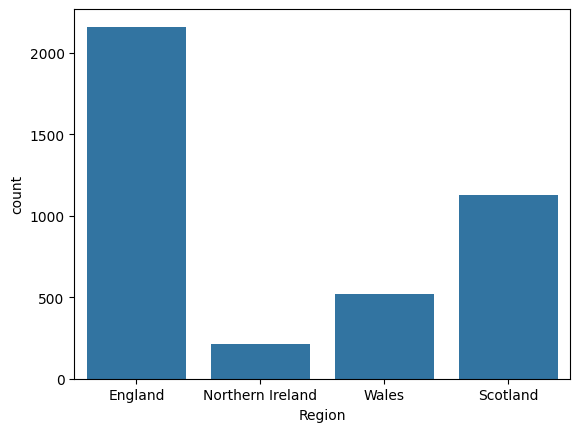

In [240]:
sns.countplot(x='Region',data=df)

<Axes: xlabel='Job Classification', ylabel='count'>

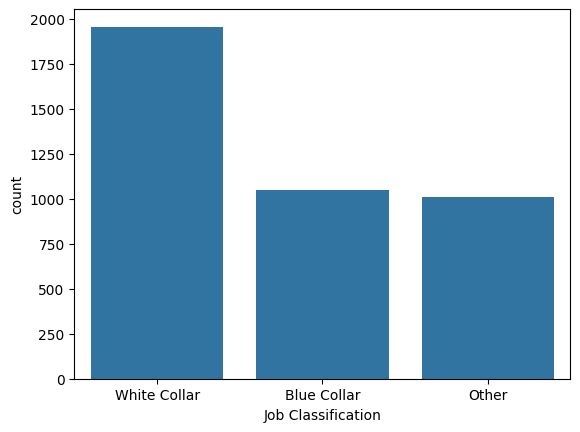

In [241]:
sns.countplot(x='Job Classification',data=df)

<Axes: xlabel='Gender', ylabel='count'>

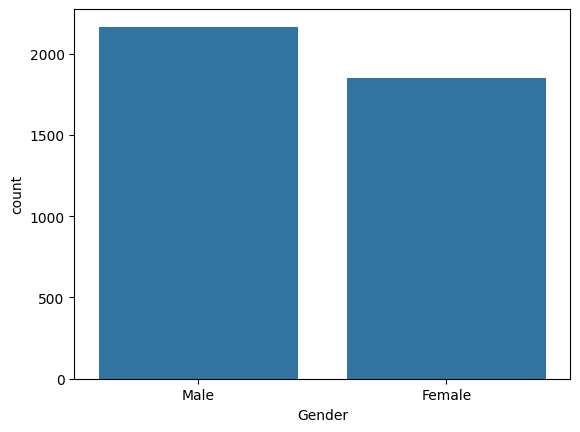

In [242]:
sns.countplot(x='Gender',data=df)

Removing outliers

In [243]:
q1 = df['loan_eligibility'].quantile(0.25)
q3 = df['loan_eligibility'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print(f'Outliers are values less than {lower_fence:.2f} or greater than {upper_fence:.2f}')

outliers = df[(df['loan_eligibility'] < lower_fence) | (df['loan_eligibility'] > upper_fence)]

num_outliers = len(outliers)
print("Number of outliers:", num_outliers)

#removing outliers
df = df[(df['loan_eligibility'] >=lower_fence) & (df['loan_eligibility'] <= upper_fence)]




Outliers are values less than -418126.44 or greater than 696877.41
Number of outliers: 335


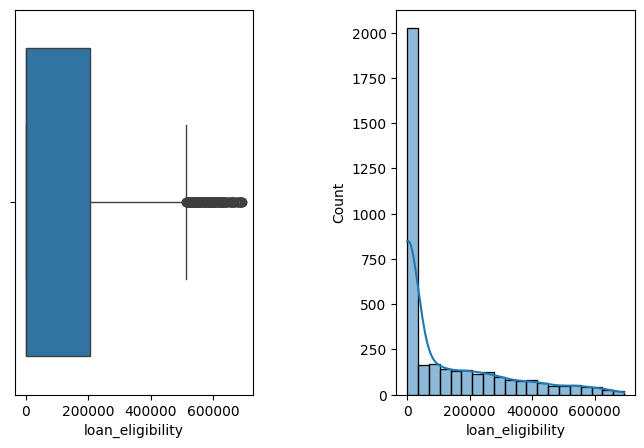

In [244]:
#checking agaiing outliers
# def draw_visual(col):
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='loan_eligibility',data=df,ax=ax[0])
sns.histplot(x='loan_eligibility',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)





In [245]:
#checking outliers for balance column

q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
print(f'Outliers are values less than {lower_fence:.2f} or greater than {upper_fence:.2f}')

outliers = df[(df['Balance'] < lower_fence) | (df['Balance'] > upper_fence)]

num_outliers = len(outliers)
print("Number of outliers:", num_outliers)


#removing outliers
df = df[(df['Balance'] >=lower_fence) & (df['Balance'] <= upper_fence)]




Outliers are values less than -43205.97 or greater than 111283.05
Number of outliers: 74


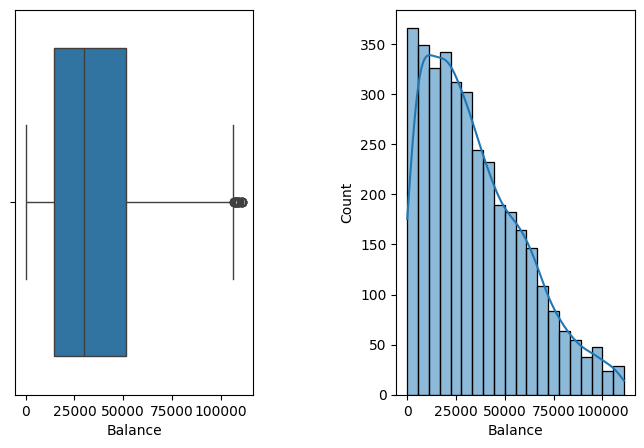

In [246]:
#checking agaiing outliers
# def draw_visual(col):
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,5))
sns.boxplot(x='Balance',data=df,ax=ax[0])
sns.histplot(x='Balance',data = df,kde=True,bins=20,ax=ax[1])
plt.subplots_adjust(wspace=0.6)





In [247]:
df.head(10)

,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
1,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
3,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95
6,Female,34,England,Blue Collar,11.Jan.15,42879.84,2644.0,467.0,214399.20
7,Female,48,Scotland,Other,11.Jan.15,36680.17,7824.0,314.0,0.00
8,Female,33,Wales,White Collar,11.Jan.15,74284.35,2566.0,498.0,0.00
9,Male,42,England,White Collar,12.Jan.15,10912.45,4327.0,625.0,218249.00
10,Male,40,England,White Collar,12.Jan.15,39667.83,6408.0,461.0,198339.15
11,Male,39,England,White Collar,12.Jan.15,32281.62,3742.0,538.0,322816.20
12,Male,24,England,White Collar,12.Jan.15,40781.63,6616.0,524.0,407816.30


In [248]:
#Extractring dy,month and year column as it is important if a customer is staying more then he is more loyal to bank


df['Date Joined'] = pd.to_datetime(df['Date Joined'])




df['day'] = df['Date Joined'].dt.day
df['month'] = df['Date Joined'].dt.month
df['year'] = df['Date Joined'].dt.year


#removing date joined column
df = df.drop(columns=['Date Joined'],axis=1)

<ipython-input-248-8ae0de9e7e8d>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


In [249]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in df.columns:
    df[col] = label.fit_transform(df[col])

In [250]:
df.head()

,Gender,Age,Region,Job Classification,Balance,loan,score,loan_eligibility,day,month,year
1,0,18,1,0,2157,2637,397,0,5,0,0
3,1,16,3,2,82,2106,372,0,7,0,0
4,0,22,0,0,2096,501,105,786,8,0,0
6,0,18,0,0,2403,518,167,935,10,0,0
7,0,32,2,1,2141,2279,14,0,10,0,0


In [251]:
#splittiing data to independe and dependent

X = df.drop(columns=['loan_eligibility'],axis=1)
y = df['loan_eligibility']

In [252]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [253]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [254]:
from sklearn.linear_model import LinearRegression


In [255]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)


LinearRegression()

In [256]:
#prediction for test data
y_pred = lr_model.predict(X_test)


In [257]:
#prediction for train data
y_pred_train = lr_model.predict(X_train)

In [258]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [259]:
print('Train Performance:')
print('R2 score',r2_score(y_train,y_pred_train))
print('MAE',mean_absolute_error(y_train,y_pred_train))
print('MSE',mean_squared_error(y_train,y_pred_train))

Train Performance:
R2 score 0.6744858856930529
MAE 273.62806761643515
MSE 111046.66647085956


In [260]:
print('Test Performance:')
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_pred,y_test))

Test Performance:
R2 score 0.6515765657007209
MAE 271.015015783877
MSE 109249.43976736226


Conclusion :here we can see that train and test accuracy is quite comparable so it is not a overfitting case

In [261]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

In [262]:
print('Test Performance:')
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_pred,y_test))

Test Performance:
R2 score 0.9991577911166845
MAE 3.1844660194174756
MSE 264.07766990291265


In [263]:
import xgboost as xgb

In [264]:
xgb_model = xgb.XGBRegressor()

In [265]:
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print('R2 score of training ',r2_score(y_train,y_pred_train))
print('R2 score of testing ',r2_score(y_test,y_pred))



R2 score of training  0.6744858856930529
R2 score of testing  0.9980305187079934


In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import xgboost as xgb

param_grid = {
    'max_depth': [5,7,8],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],

}


xgb_model = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best score found:", best_score)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


accuracy = r2_score(y_test,y_pred)
print("Test set accuracy with best model:", accuracy)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best score found: 0.9990087918410495
Test set accuracy with best model: 0.9980914668077854


In [267]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


y_pred = rf.predict(X_test)

y_pred_train = rf.predict(X_train)

print('R2 score of training ',r2_score(y_train,y_pred_train))
print('R2 score of testing ',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))
# print('MSE',mean_squared_error(y_pred,y_test))

R2 score of training  1.0
R2 score of testing  0.7801622271810783


In [273]:
# # Applying 10-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring='r2')

# print('Cross-validation scores:{}'.format(scores))

In [271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None,5,8,12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [272]:
r2_score(y_test,y_pred)

0.9993272976966427